In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import patsy
import scipy.stats as stats
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
#read in the CSV as a dataframe 
df = pd.read_csv('modified_fifa_data.csv', index_col = 0)
# drop NAs and set Value_Euro as a interger 
df.dropna
df['Value_Euro'].fillna(0).astype(int)
df.head()

,Name,Age,Height_Cm,Weight_Kgs,Positions,Nationality,Overall_Rating,Potential,Value_Euro,International_Reputation_1_5,...,Ldm,Cdm,Rdm,Rwb,Lb,Lcb,Cb,Rcb,Rb,Original_Position
Id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,170.18,72.1,FW,Argentina,94,94,110500000.0,5,...,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2,"CF,RW,ST"
190460,C. Eriksen,27,154.94,76.2,MF,Denmark,88,89,69500000.0,3,...,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3,"CAM,RM,CM"
195864,P. Pogba,25,190.50,83.9,MF,France,88,91,73000000.0,4,...,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3,"CM,CAM"
198219,L. Insigne,27,162.56,59.0,MF,Italy,88,88,62000000.0,3,...,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3,"LW,ST"
201024,K. Koulibaly,27,187.96,88.9,DF,Senegal,88,91,60000000.0,3,...,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3,CB


In [4]:
age_df = df['Age']
age_df

Id
158023    31
190460    27
195864    25
198219    27
201024    27
          ..
204322    25
239762    23
235155    22
244883    21
247187    19
Name: Age, Length: 17954, dtype: int64

In [5]:
name_df = df['Name']
name_df

Id
158023          L. Messi
190460        C. Eriksen
195864          P. Pogba
198219        L. Insigne
201024      K. Koulibaly
               ...      
204322       R. McKenzie
239762         M. Sipľak
235155        J. Bekkema
244883        A. Al Yami
247187    Júnior Brumado
Name: Name, Length: 17954, dtype: object

In [6]:
df = df[df['Value_Euro']!=1000]
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17954 entries, 158023 to 247187
Data columns (total 75 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          17954 non-null  object 
 1   Age                           17954 non-null  int64  
 2   Height_Cm                     17954 non-null  float64
 3   Weight_Kgs                    17954 non-null  float64
 4   Positions                     17954 non-null  object 
 5   Nationality                   17954 non-null  object 
 6   Overall_Rating                17954 non-null  int64  
 7   Potential                     17954 non-null  int64  
 8   Value_Euro                    17699 non-null  float64
 9   International_Reputation_1_5  17954 non-null  int64  
 10  Skill_Moves_1_5               17954 non-null  int64  
 11  Work_Rate                     17954 non-null  object 
 12  Club_Team                     17940 non-null  object 


In [7]:
#create dataframes for use later
new_df = df.copy()
new_df.drop(['Overall_Rating','Potential','Work_Rate'],axis=1,inplace=True)
new_df.head()

,Name,Age,Height_Cm,Weight_Kgs,Positions,Nationality,Value_Euro,International_Reputation_1_5,Skill_Moves_1_5,Club_Team,...,Ldm,Cdm,Rdm,Rwb,Lb,Lcb,Cb,Rcb,Rb,Original_Position
Id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,170.18,72.1,FW,Argentina,110500000.0,5,4,FC Barcelona,...,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2,"CF,RW,ST"
190460,C. Eriksen,27,154.94,76.2,MF,Denmark,69500000.0,3,4,Tottenham Hotspur,...,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3,"CAM,RM,CM"
195864,P. Pogba,25,190.50,83.9,MF,France,73000000.0,4,5,Manchester United,...,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3,"CM,CAM"
198219,L. Insigne,27,162.56,59.0,MF,Italy,62000000.0,3,4,Napoli,...,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3,"LW,ST"
201024,K. Koulibaly,27,187.96,88.9,DF,Senegal,60000000.0,3,2,Napoli,...,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3,CB


In [8]:
new_df.sort_values(['Value_Euro'], ascending=False)

,Name,Age,Height_Cm,Weight_Kgs,Positions,Nationality,Value_Euro,International_Reputation_1_5,Skill_Moves_1_5,Club_Team,...,Ldm,Cdm,Rdm,Rwb,Lb,Lcb,Cb,Rcb,Rb,Original_Position
Id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,170.18,72.1,FW,Argentina,110500000.0,5,4,FC Barcelona,...,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2,"CF,RW,ST"
190871,Neymar Jr,27,175.26,68.0,MF,Brazil,108000000.0,5,5,Paris Saint-Germain,...,60+3,60+3,60+3,66+3,61+3,47+3,47+3,47+3,61+3,"LW,CAM"
192985,K. De Bruyne,27,154.94,69.9,MF,Belgium,102000000.0,4,4,Manchester City,...,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,"CAM,CM"
202126,H. Kane,25,187.96,88.9,FW,England,96500000.0,3,3,Tottenham Hotspur,...,66+3,66+3,66+3,65+3,62+3,60+3,60+3,60+3,62+3,ST
183277,E. Hazard,28,172.72,76.2,MF,Belgium,93000000.0,4,4,Chelsea,...,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,"LW,CF"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204341,Luís Neto,30,187.96,71.2,DF,Portugal,NaN,1,2,Portugal,...,72+2,72+2,72+2,67+2,69+2,75+2,75+2,75+2,69+2,CB
187607,A. Dzyuba,30,195.58,91.2,FW,Russia,NaN,2,3,Russia,...,52+2,52+2,52+2,52+2,48+2,48+2,48+2,48+2,48+2,ST
187347,I. Smolnikov,30,152.40,69.9,DF,Russia,NaN,2,3,Russia,...,75+2,75+2,75+2,78+2,78+2,73+2,73+2,73+2,78+2,RB


In [9]:
#drop coloums that are not rationals
prep_df = df.copy()
prep_df.drop(['Age','Height_Cm','Weight_Kgs','Positions','Nationality','International_Reputation_1_5','Skill_Moves_1_5','Club_Team','National_Team','Ls','St','Rs','Lw','Lf','Cf','Rf','Rw','Lam','Cam','Ram','Lm','Lcm','Cm','Rcm','Rm','Lwb','Ldm','Cdm','Rdm','Rwb','Lb','Lcb','Cb','Rcb','Rb',],axis=1,inplace=True)
prep_df

,Name,Overall_Rating,Potential,Value_Euro,Work_Rate,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,...,Composure,Marking,Standing_Tackle,Sliding_Tackle,Gk_Diving,Gk_Handling,Gk_Kicking,Gk_Positioning,Gk_Reflexes,Original_Position
Id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,94,94,110500000.0,Medium/ Low,86,95,70,92,86,...,96,33,28,26,6,11,15,14,8,"CF,RW,ST"
190460,C. Eriksen,88,89,69500000.0,High/ Medium,88,81,52,91,80,...,88,59,57,22,9,14,7,7,6,"CAM,RM,CM"
195864,P. Pogba,88,91,73000000.0,High/ Medium,80,75,75,86,85,...,87,63,67,67,5,6,2,4,3,"CM,CAM"
198219,L. Insigne,88,88,62000000.0,High/ Medium,86,77,56,85,74,...,83,51,24,22,8,4,14,9,10,"LW,ST"
201024,K. Koulibaly,88,91,60000000.0,High/ High,30,22,83,68,14,...,80,91,88,87,7,11,7,13,5,CB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204322,R. McKenzie,67,70,975000.0,High/ Medium,57,61,60,66,37,...,56,40,20,18,15,11,15,12,7,"RM,CAM,CM"
239762,M. Sipľak,59,67,190000.0,Medium/ High,50,19,53,55,31,...,52,53,64,60,15,7,7,15,8,LB
235155,J. Bekkema,59,67,170000.0,Medium/ Medium,11,9,13,26,9,...,47,9,12,13,63,57,50,58,63,GK


In [10]:
#removing outlyers 
prep_df[['Value_Euro']].describe()

,Value_Euro
count,1.769900e+04
mean,2.479280e+06
std,5.687014e+06
min,1.000000e+04
25%,3.250000e+05
50%,7.000000e+05
75%,2.100000e+06
max,1.105000e+08


In [11]:
Q1 = prep_df['Value_Euro'].quantile(0.25)
Q1

325000.0

In [12]:
Q3 = prep_df['Value_Euro'].quantile(0.75)
Q3

2100000.0

In [13]:
IQR = Q3 - Q1

In [14]:
IQR

1775000.0

In [15]:
upper_lim = Q1 - 1.5 * IQR
lower_lim = Q3  + 1.5 * IQR

In [16]:
upper_lim

-2337500.0

In [17]:
lower_lim

4762500.0

In [18]:
#double checking for nulls
prep_df.isnull().sum()

Name                   0
Overall_Rating         0
Potential              0
Value_Euro           255
Work_Rate              0
Crossing               0
Finishing              0
Heading_Accuracy       0
Short_Passing          0
Volleys                0
Dribbling              0
Curve                  0
Freekick_Accuracy      0
Long_Passing           0
Ball_Control           0
Acceleration           0
Sprint_Speed           0
Agility                0
Reactions              0
Balance                0
Shot_Power             0
Jumping                0
Stamina                0
Strength               0
Long_Shots             0
Aggression             0
Interceptions          0
Positioning            0
Vision                 0
Penalties              0
Composure              0
Marking                0
Standing_Tackle        0
Sliding_Tackle         0
Gk_Diving              0
Gk_Handling            0
Gk_Kicking             0
Gk_Positioning         0
Gk_Reflexes            0
Original_Position      0


In [19]:
prep_df = prep_df.dropna()
prep_df.isnull().sum()

Name                 0
Overall_Rating       0
Potential            0
Value_Euro           0
Work_Rate            0
Crossing             0
Finishing            0
Heading_Accuracy     0
Short_Passing        0
Volleys              0
Dribbling            0
Curve                0
Freekick_Accuracy    0
Long_Passing         0
Ball_Control         0
Acceleration         0
Sprint_Speed         0
Agility              0
Reactions            0
Balance              0
Shot_Power           0
Jumping              0
Stamina              0
Strength             0
Long_Shots           0
Aggression           0
Interceptions        0
Positioning          0
Vision               0
Penalties            0
Composure            0
Marking              0
Standing_Tackle      0
Sliding_Tackle       0
Gk_Diving            0
Gk_Handling          0
Gk_Kicking           0
Gk_Positioning       0
Gk_Reflexes          0
Original_Position    0
dtype: int64

In [20]:
#checking the data types
prep_df.dtypes

Name                  object
Overall_Rating         int64
Potential              int64
Value_Euro           float64
Work_Rate             object
Crossing               int64
Finishing              int64
Heading_Accuracy       int64
Short_Passing          int64
Volleys                int64
Dribbling              int64
Curve                  int64
Freekick_Accuracy      int64
Long_Passing           int64
Ball_Control           int64
Acceleration           int64
Sprint_Speed           int64
Agility                int64
Reactions              int64
Balance                int64
Shot_Power             int64
Jumping                int64
Stamina                int64
Strength               int64
Long_Shots             int64
Aggression             int64
Interceptions          int64
Positioning            int64
Vision                 int64
Penalties              int64
Composure              int64
Marking                int64
Standing_Tackle        int64
Sliding_Tackle         int64
Gk_Diving     

In [21]:
# pass skills and target value through lambda funciton
df_show = prep_df.copy()
df_show['Value_Euro'] = df_show['Value_Euro'].apply(lambda x : "{:,}".format(int(x)))
df_show[['Overall_Rating', 'Potential', 'Crossing', 'Finishing',
          'Heading_Accuracy', 'Short_Passing', 'Volleys', 'Dribbling', 'Curve', 'Freekick_Accuracy', 'Long_Passing',
          'Ball_Control','Acceleration', 'Sprint_Speed', 'Agility', 'Reactions', 'Balance',' Shot_Power',
          'Jumping', 'Stamina', 'Strength', 'Long_Shots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
          'Penalties', 'Composure', 'Marking', 'Standing_Tackle', 'Sliding_Tackle', 'Gk_Diving', 'Gk_Handling',
          'Gk_Kicking', 'Gk_Positioning', 'Gk_Reflexes']] = df_show[['Overall_Rating', 'Potential', 'Crossing',
                  'Finishing', 'Heading_Accuracy', 'Short_Passing', 'Volleys', 'Dribbling', 'Curve',
                  'Freekick_Accuracy', 'Long_Passing', 'Ball_Control', 'Acceleration', 'Sprint_Speed','Agility',
                  'Reactions', 'Balance', 'Shot_Power', 'Jumping', 'Stamina', 'Strength', 'Long_Shots', 'Aggression',
                  'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'Standing_Tackle',
                  'Sliding_Tackle', 'Gk_Diving', 'Gk_Handling', 'Gk_Kicking', 'Gk_Positioning', 'Gk_Reflexes']].apply(lambda x: round(x,1))
df_show = df_show.rename(columns={'Value_Euro':'Value_Euro'})
df_show

,Name,Overall_Rating,Potential,Value_Euro,Work_Rate,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,...,Marking,Standing_Tackle,Sliding_Tackle,Gk_Diving,Gk_Handling,Gk_Kicking,Gk_Positioning,Gk_Reflexes,Original_Position,Shot_Power
Id,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,94,94,"110,500,000",Medium/ Low,86,95,70,92,86,...,33,28,26,6,11,15,14,8,"CF,RW,ST",85
190460,C. Eriksen,88,89,"69,500,000",High/ Medium,88,81,52,91,80,...,59,57,22,9,14,7,7,6,"CAM,RM,CM",84
195864,P. Pogba,88,91,"73,000,000",High/ Medium,80,75,75,86,85,...,63,67,67,5,6,2,4,3,"CM,CAM",90
198219,L. Insigne,88,88,"62,000,000",High/ Medium,86,77,56,85,74,...,51,24,22,8,4,14,9,10,"LW,ST",75
201024,K. Koulibaly,88,91,"60,000,000",High/ High,30,22,83,68,14,...,91,88,87,7,11,7,13,5,CB,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204322,R. McKenzie,67,70,"975,000",High/ Medium,57,61,60,66,37,...,40,20,18,15,11,15,12,7,"RM,CAM,CM",51
239762,M. Sipľak,59,67,"190,000",Medium/ High,50,19,53,55,31,...,53,64,60,15,7,7,15,8,LB,27
235155,J. Bekkema,59,67,"170,000",Medium/ Medium,11,9,13,26,9,...,9,12,13,63,57,50,58,63,GK,17


In [22]:
#passing origonal df through CORR_MATRIX to get Pearson Correlation Coefficient between each pair of its input columns
corr_matrix = df.corr()
corr_matrix

,Age,Height_Cm,Weight_Kgs,Overall_Rating,Potential,Value_Euro,International_Reputation_1_5,Skill_Moves_1_5,Crossing,Finishing,...,Penalties,Composure,Marking,Standing_Tackle,Sliding_Tackle,Gk_Diving,Gk_Handling,Gk_Kicking,Gk_Positioning,Gk_Reflexes
Age,1.000000,0.059579,0.233819,0.461529,-0.259579,0.082360,0.259977,0.029681,0.133357,0.074761,...,0.147924,0.394717,0.146725,0.118362,0.103008,0.100785,0.105334,0.104697,0.115960,0.102587
Height_Cm,0.059579,1.000000,0.495320,0.038080,0.008526,0.011144,0.026850,-0.320141,-0.388805,-0.296794,...,-0.272134,-0.111849,-0.089783,-0.081452,-0.086093,0.295386,0.296296,0.291707,0.296131,0.296989
Weight_Kgs,0.233819,0.495320,1.000000,0.150521,-0.015099,0.044519,0.085086,-0.353601,-0.394145,-0.294710,...,-0.251453,-0.044538,-0.057559,-0.056318,-0.065965,0.342368,0.341784,0.339684,0.343853,0.343440
Overall_Rating,0.461529,0.038080,0.150521,1.000000,0.647249,0.630928,0.489416,0.418718,0.398343,0.342331,...,0.350902,0.729278,0.292538,0.254481,0.225466,-0.030501,-0.029850,-0.032884,-0.021115,-0.027478
Potential,-0.259579,0.008526,-0.015099,0.647249,1.000000,0.576341,0.358874,0.356241,0.244438,0.247552,...,0.226746,0.434113,0.162999,0.143927,0.129755,-0.060147,-0.060974,-0.064471,-0.058313,-0.058856
Value_Euro,0.082360,0.011144,0.044519,0.630928,0.576341,1.000000,0.644610,0.317427,0.251093,0.261003,...,0.243599,0.456538,0.138085,0.110455,0.090450,-0.028961,-0.029126,-0.030189,-0.027929,-0.028677
International_Reputation_1_5,0.259977,0.026850,0.085086,0.489416,0.358874,0.644610,1.000000,0.205661,0.191443,0.179789,...,0.220608,0.388906,0.115318,0.089809,0.077267,0.001573,0.001501,-0.001422,0.004486,0.000769
Skill_Moves_1_5,0.029681,-0.320141,-0.353601,0.418718,0.356241,0.317427,0.205661,1.000000,0.746466,0.748492,...,0.695889,0.598595,0.255601,0.225532,0.193438,-0.626246,-0.625743,-0.621980,-0.623727,-0.627320
Crossing,0.133357,-0.388805,-0.394145,0.398343,0.244438,0.251093,0.191443,0.746466,1.000000,0.664183,...,0.655166,0.589726,0.457401,0.440578,0.422407,-0.670197,-0.667971,-0.666225,-0.667231,-0.669792
Finishing,0.074761,-0.296794,-0.294710,0.342331,0.247552,0.261003,0.179789,0.748492,0.664183,1.000000,...,0.840504,0.550520,0.042058,-0.013427,-0.051432,-0.594444,-0.593377,-0.589002,-0.590215,-0.592615


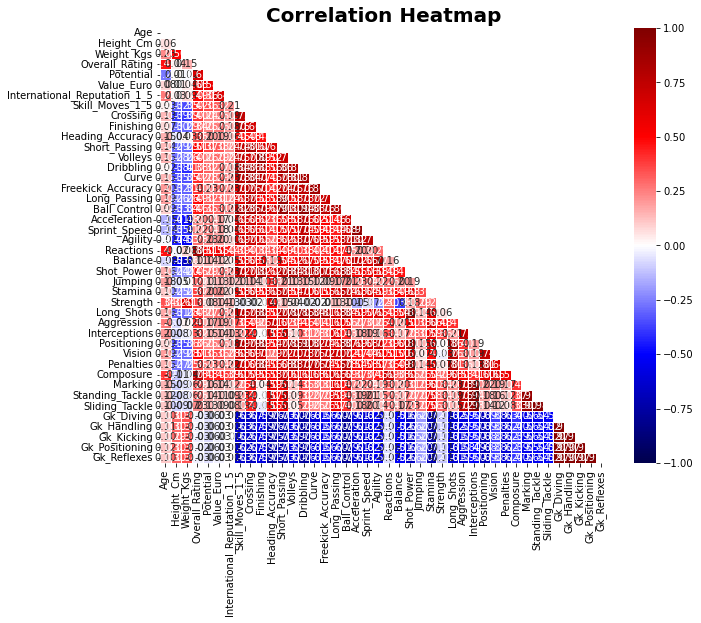

In [23]:
corr_matrix = df.corr()
fig = plt.figure(figsize=[10,8])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,cmap='seismic',linewidth=1,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=20)
plt.savefig('heatmap2.png',transparent=True, bbox_inches='tight')

In [24]:
prep_df1 = prep_df.copy()

In [25]:
prep_df1 = prep_df1[['Overall_Rating', 'Potential', 'Crossing', 'Finishing',
          'Heading_Accuracy', 'Short_Passing', 'Volleys', 'Dribbling', 'Curve', 'Freekick_Accuracy', 'Long_Passing',
          'Ball_Control','Acceleration', 'Sprint_Speed', 'Agility', 'Reactions', 'Balance','Shot_Power',
          'Jumping', 'Stamina', 'Strength', 'Long_Shots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
          'Penalties', 'Composure', 'Marking', 'Standing_Tackle', 'Sliding_Tackle', 'Gk_Diving', 'Gk_Handling',
          'Gk_Kicking', 'Gk_Positioning', 'Gk_Reflexes']].astype(float)

In [26]:
prep_df1['Value_Euro'] = np.log(df['Value_Euro'])

In [27]:
# applying the log fucntion to Value_Euro to normalize them. More detail can be found on the READ.ME
prep_df1 = prep_df1.rename(columns={'Value_Euro':'Log Value_Euro'})

In [28]:
# adding back player age
prep_df2 = prep_df1.join(age_df, how='inner')
prep_df2

,Overall_Rating,Potential,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,Curve,Freekick_Accuracy,...,Marking,Standing_Tackle,Sliding_Tackle,Gk_Diving,Gk_Handling,Gk_Kicking,Gk_Positioning,Gk_Reflexes,Log Value_Euro,Age
Id,,,,,,,,,,,,,,,,,,,,,
158023,94.0,94.0,86.0,95.0,70.0,92.0,86.0,97.0,93.0,94.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,18.520526,31
190460,88.0,89.0,88.0,81.0,52.0,91.0,80.0,84.0,86.0,87.0,...,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,18.056837,27
195864,88.0,91.0,80.0,75.0,75.0,86.0,85.0,87.0,85.0,82.0,...,63.0,67.0,67.0,5.0,6.0,2.0,4.0,3.0,18.105970,25
198219,88.0,88.0,86.0,77.0,56.0,85.0,74.0,90.0,87.0,77.0,...,51.0,24.0,22.0,8.0,4.0,14.0,9.0,10.0,17.942645,27
201024,88.0,91.0,30.0,22.0,83.0,68.0,14.0,69.0,28.0,28.0,...,91.0,88.0,87.0,7.0,11.0,7.0,13.0,5.0,17.909855,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204322,67.0,70.0,57.0,61.0,60.0,66.0,37.0,64.0,53.0,47.0,...,40.0,20.0,18.0,15.0,11.0,15.0,12.0,7.0,13.790193,25
239762,59.0,67.0,50.0,19.0,53.0,55.0,31.0,52.0,26.0,28.0,...,53.0,64.0,60.0,15.0,7.0,7.0,15.0,8.0,12.154779,23
235155,59.0,67.0,11.0,9.0,13.0,26.0,9.0,12.0,13.0,12.0,...,9.0,12.0,13.0,63.0,57.0,50.0,58.0,63.0,12.043554,22


In [29]:
# fidning the r-squared for the data set base model
y, X = patsy.dmatrices("Q('Log Value_Euro') ~ Age + Q('Dribbling') + Reactions + Sliding_Tackle + Gk_Kicking + Gk_Handling + Gk_Diving + Composure + Short_Passing + Long_Passing + Overall_Rating + Potential + Finishing+Standing_Tackle + Heading_Accuracy + Gk_Positioning + Marking + Volleys +Strength + Gk_Kicking + Gk_Diving + Gk_Handling + Curve +Acceleration+Sprint_Speed + Agility + Balance + Freekick_Accuracy + Interceptions + Jumping + Aggression + Shot_Power+ Vision + Ball_Control+ Positioning + Gk_Reflexes", data=prep_df2, return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Q('Log Value_Euro')   R-squared:                       0.971
Model:                             OLS   Adj. R-squared:                  0.971
Method:                  Least Squares   F-statistic:                 1.784e+04
Date:                 Sat, 09 Apr 2022   Prob (F-statistic):               0.00
Time:                         15:50:08   Log-Likelihood:                 93.121
No. Observations:                17699   AIC:                            -118.2
Df Residuals:                    17665   BIC:                             146.3
Df Model:                           33                                         
Covariance Type:             nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.8135      0.039     46.988      0.000       1.738       1.889
Age                  -0.0978      0.001   -115.503      0.000      -0.099      -0.096
Q('Dribbling')       -0.0007      0.000     -1.708      0.088      -0.001    9.62e-05
Reactions             0.0019      0.000      4.549      0.000       0.001       0.003
Sliding_Tackle       -0.0018      0.000     -4.441      0.000      -0.003      -0.001
Gk_Kicking           -0.0010      0.001     -1.875      0.061      -0.002    4.38e-05
Gk_Handling          -0.0017      0.001     -2.997      0.003      -0.003      -0.001
Gk_Diving             0.0014      0.001      2.534      0.011       0.000       0.002
Composure            -0.0006      0.000     -1.835      0.067      -0.001    3.79e-05
Short_Passing         0.0002      0.000      0.423      0.672      -0.001       0.001
Long_Passing          0.0008      0.000      2.548      0.011       0.000       0.001
Overall_Rating        0.2186      0.001    231.797      0.000       0.217       0.220
Potential            -0.0033      0.001     -4.686      0.000      -0.005      -0.002
Finishing             0.0013      0.000      4.601      0.000       0.001       0.002
Standing_Tackle       0.0003      0.000      0.712      0.476      -0.001       0.001
Heading_Accuracy      0.0006      0.000      2.359      0.018       0.000       0.001
Gk_Positioning       -0.0026      0.001     -4.782      0.000      -0.004      -0.002
Marking              -0.0013      0.000     -5.194      0.000      -0.002      -0.001
Volleys               0.0015      0.000      5.588      0.000       0.001       0.002
Strength          -1.474e-05      0.000     -0.064      0.949      -0.000       0.000
Curve                -0.0005      0.000     -1.923      0.054      -0.001    9.35e-06
Acceleration       1.325e-05      0.000      0.036      0.972      -0.001       0.001
Sprint_Speed      -7.498e-05      0.000     -0.219      0.827      -0.001       0.001
Agility           -4.244e-05      0.000     -0.156      0.876      -0.001       0.000
Balance              -0.0003      0.000     -1.208      0.227      -0.001       0.000
Freekick_Accuracy     0.0010      0.000      4.305      0.000       0.001       0.001
Interceptions      4.854e-05      0.000      0.163      0.870      -0.001       0.001
Jumping           -5.566e-05      0.000     -0.289      0.773      -0.000       0.000
Aggression            0.0004      0.000      1.968      0.049    1.52e-06       0.001
Shot_Power            0.0004      0.000      1.418      0.156      -0.000       0.001
Vision                0.0013      0.000      4.740      0.000       0.001       0.002
Ball_Control         -0.0024      0.000     -4.846      0.000      -0.003      -0.001
Positioning           0.0010      0.000      3.361      0.001 

In [30]:
#making linear regession using seaborn
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(pred,y,alpha=0.1)
    plt.plot(y, y, color='red',linewidth=1,)
    plt.title("Regression fit")
    plt.xlabel("Predicted y")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res,alpha=0.1)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    print(res)    
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt,)
    plt.title("Normal Q-Q plot")

In [31]:
prep_df3 = prep_df2.copy()


In [32]:
prep_df3

,Overall_Rating,Potential,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,Curve,Freekick_Accuracy,...,Marking,Standing_Tackle,Sliding_Tackle,Gk_Diving,Gk_Handling,Gk_Kicking,Gk_Positioning,Gk_Reflexes,Log Value_Euro,Age
Id,,,,,,,,,,,,,,,,,,,,,
158023,94.0,94.0,86.0,95.0,70.0,92.0,86.0,97.0,93.0,94.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,18.520526,31
190460,88.0,89.0,88.0,81.0,52.0,91.0,80.0,84.0,86.0,87.0,...,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,18.056837,27
195864,88.0,91.0,80.0,75.0,75.0,86.0,85.0,87.0,85.0,82.0,...,63.0,67.0,67.0,5.0,6.0,2.0,4.0,3.0,18.105970,25
198219,88.0,88.0,86.0,77.0,56.0,85.0,74.0,90.0,87.0,77.0,...,51.0,24.0,22.0,8.0,4.0,14.0,9.0,10.0,17.942645,27
201024,88.0,91.0,30.0,22.0,83.0,68.0,14.0,69.0,28.0,28.0,...,91.0,88.0,87.0,7.0,11.0,7.0,13.0,5.0,17.909855,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204322,67.0,70.0,57.0,61.0,60.0,66.0,37.0,64.0,53.0,47.0,...,40.0,20.0,18.0,15.0,11.0,15.0,12.0,7.0,13.790193,25
239762,59.0,67.0,50.0,19.0,53.0,55.0,31.0,52.0,26.0,28.0,...,53.0,64.0,60.0,15.0,7.0,7.0,15.0,8.0,12.154779,23
235155,59.0,67.0,11.0,9.0,13.0,26.0,9.0,12.0,13.0,12.0,...,9.0,12.0,13.0,63.0,57.0,50.0,58.0,63.0,12.043554,22


In [33]:
prep_df4 = prep_df3.copy()

In [34]:
prep_df4.head()

,Overall_Rating,Potential,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,Curve,Freekick_Accuracy,...,Marking,Standing_Tackle,Sliding_Tackle,Gk_Diving,Gk_Handling,Gk_Kicking,Gk_Positioning,Gk_Reflexes,Log Value_Euro,Age
Id,,,,,,,,,,,,,,,,,,,,,
158023,94.0,94.0,86.0,95.0,70.0,92.0,86.0,97.0,93.0,94.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,18.520526,31
190460,88.0,89.0,88.0,81.0,52.0,91.0,80.0,84.0,86.0,87.0,...,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,18.056837,27
195864,88.0,91.0,80.0,75.0,75.0,86.0,85.0,87.0,85.0,82.0,...,63.0,67.0,67.0,5.0,6.0,2.0,4.0,3.0,18.105970,25
198219,88.0,88.0,86.0,77.0,56.0,85.0,74.0,90.0,87.0,77.0,...,51.0,24.0,22.0,8.0,4.0,14.0,9.0,10.0,17.942645,27
201024,88.0,91.0,30.0,22.0,83.0,68.0,14.0,69.0,28.0,28.0,...,91.0,88.0,87.0,7.0,11.0,7.0,13.0,5.0,17.909855,27


In [35]:
prep_df5 = prep_df4.reset_index()

In [36]:
prep_df5.head()

,Id,Overall_Rating,Potential,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,Curve,...,Marking,Standing_Tackle,Sliding_Tackle,Gk_Diving,Gk_Handling,Gk_Kicking,Gk_Positioning,Gk_Reflexes,Log Value_Euro,Age
0,158023,94.0,94.0,86.0,95.0,70.0,92.0,86.0,97.0,93.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,18.520526,31
1,190460,88.0,89.0,88.0,81.0,52.0,91.0,80.0,84.0,86.0,...,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,18.056837,27
2,195864,88.0,91.0,80.0,75.0,75.0,86.0,85.0,87.0,85.0,...,63.0,67.0,67.0,5.0,6.0,2.0,4.0,3.0,18.105970,25
3,198219,88.0,88.0,86.0,77.0,56.0,85.0,74.0,90.0,87.0,...,51.0,24.0,22.0,8.0,4.0,14.0,9.0,10.0,17.942645,27
4,201024,88.0,91.0,30.0,22.0,83.0,68.0,14.0,69.0,28.0,...,91.0,88.0,87.0,7.0,11.0,7.0,13.0,5.0,17.909855,27


In [37]:
y = prep_df5['Log Value_Euro']
X = prep_df5.drop(['Id','Log Value_Euro','Overall_Rating'],axis=1)

0       -0.496236
1        0.117294
2        0.203215
3        0.593765
4        0.536745
           ...   
17694   -0.005459
17695   -0.105947
17696    0.153352
17697   -0.388395
17698   -0.617967
Name: Log Value_Euro, Length: 17699, dtype: float64


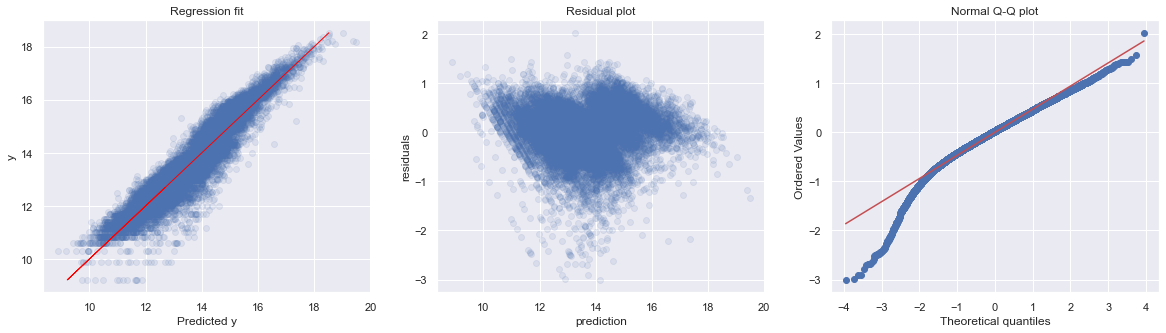

In [38]:
sns.set(style='darkgrid')
diagnostic_plot(X, y)

In [39]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


In [40]:
selected_columns = ['Age',  'Crossing', 'Finishing',
          'Heading_Accuracy', 'Short_Passing', 'Volleys', 'Dribbling', 'Curve', 'Freekick_Accuracy', 'Long_Passing',
          'Ball_Control','Acceleration', 'Sprint_Speed', 'Agility', 'Reactions', 'Balance','Shot_Power',
          'Jumping', 'Stamina', 'Strength', 'Long_Shots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
          'Penalties', 'Composure', 'Marking', 'Standing_Tackle', 'Sliding_Tackle', 'Gk_Diving', 'Gk_Handling',
          'Gk_Kicking', 'Gk_Positioning', 'Gk_Reflexes']


In [41]:
# Testing with Lasso
lasso_model = Lasso(alpha = 0.1)    
lasso_model.fit(X_train_val[selected_columns], y_train_val)
list(zip(selected_columns, lasso_model.coef_))
## doing feature selection with Lasso

[('Age', -0.08091314677201761),
 ('Crossing', 0.0),
 ('Finishing', 0.0038617914774708374),
 ('Heading_Accuracy', 0.01930205466844817),
 ('Short_Passing', 0.014017672837482693),
 ('Volleys', 0.0005041088934164585),
 ('Dribbling', 0.0033579751413696434),
 ('Curve', 0.0013491758915024862),
 ('Freekick_Accuracy', 0.0006449771971777145),
 ('Long_Passing', -0.0),
 ('Ball_Control', 0.028858870246345515),
 ('Acceleration', 0.007603449117600014),
 ('Sprint_Speed', 0.0064403840198060435),
 ('Agility', -0.0),
 ('Reactions', 0.06429087335813242),
 ('Balance', -0.004392692869193906),
 ('Shot_Power', 0.004534090345692334),
 ('Jumping', 0.0),
 ('Stamina', 0.0018921231450965577),
 ('Strength', 0.0070762854495216646),
 ('Long_Shots', -0.0006214561908010364),
 ('Aggression', 0.0),
 ('Interceptions', -0.0),
 ('Positioning', -0.0070108429285734965),
 ('Vision', -0.0),
 ('Penalties', 0.0),
 ('Composure', 0.024537104978603987),
 ('Marking', 0.004406439067599267),
 ('Standing_Tackle', 0.0),
 ('Sliding_Tackle

In [42]:
std = StandardScaler()
std.fit(X_train_val.values)
X_tr = std.transform(X_train_val.values)
X_te = std.transform(X_test.values)
## Scaling x values for lasso,ridge,elastic net

In [43]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)


In [44]:
alphavec = 10**np.linspace(-15,4,400)
lasso_model = LassoCV(alphas = alphavec, cv=kf)
lasso_model.fit(X_tr, y_train_val)
lasso_model.alpha_
## finding alpha value that gives lowest MAE for Lasso CV

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.754281293970962, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51.590293059643955, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91.7384311522651, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.497712444354875, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.734147137864056, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.311945139652835, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.170799790552337, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.38334165352353, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.172609597283554, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

6.449466771037607e-05

In [45]:
# testing with Ridged
alphavec = 10**np.linspace(-2,2,200)
ridge_model = RidgeCV(alphas = alphavec, cv=kf)
ridge_model.fit(X_tr, y_train_val)
ridge_model.alpha_
## finding alpha value that gives lowest MAE for Ridge CV

21.711179456945054

In [46]:
list(zip(X_train_val.columns, ridge_model.coef_))
# finding coefficients for optimum alpha value for Ridge

[('Potential', 0.6527400181022183),
 ('Crossing', 0.015750891704087586),
 ('Finishing', 0.08765397699388368),
 ('Heading_Accuracy', 0.19463085443017963),
 ('Short_Passing', 0.14326097832689683),
 ('Volleys', 0.028376386649471817),
 ('Dribbling', 0.05020096227030565),
 ('Curve', 0.024590553587393746),
 ('Freekick_Accuracy', 0.03435092626743514),
 ('Long_Passing', -0.008384848081439968),
 ('Ball_Control', 0.28447669169008444),
 ('Acceleration', 0.08535012644305572),
 ('Sprint_Speed', 0.07573556334164565),
 ('Agility', 0.00884035594742624),
 ('Reactions', 0.3340808847947711),
 ('Balance', -0.06378205981626281),
 ('Shot_Power', 0.060492622459697866),
 ('Jumping', 0.00110726025365109),
 ('Stamina', 0.12259833118373847),
 ('Strength', 0.07850098115372589),
 ('Long_Shots', -0.03230700780447482),
 ('Aggression', -0.0019530928660511525),
 ('Interceptions', -0.01873580098409424),
 ('Positioning', -0.09711328810498074),
 ('Vision', -0.031179936266307374),
 ('Penalties', -0.04384893043524109),
 ('

In [47]:
ridge_model_final = Ridge(alpha = 0.9329304026284686) 
Mean_R2_Ridge_CV = np.mean(cross_val_score(ridge_model_final, X_tr, y_train_val, cv=kf, scoring='r2'))
Mean_R2_Ridge_CV
# scoring the Ridge model based on CV

0.8841321507441691

In [48]:
Std_R2_Ridge_CV = np.std(cross_val_score(ridge_model_final, X_tr, y_train_val, cv=kf, scoring='r2'))
Std_R2_Ridge_CV

0.00636882439096455

In [49]:
Mean_MAE_Ridge_CV = -np.mean(cross_val_score(ridge_model_final, X_tr, y_train_val, cv=kf, scoring='neg_mean_absolute_error'))
Mean_MAE_Ridge_CV
# scoring the Ridge model based on CV

0.3662527560544344

In [50]:
Std_MAE_Ridge_CV = np.std(cross_val_score(ridge_model_final, X_tr, y_train_val, cv=kf, scoring='neg_mean_absolute_error'))
Std_MAE_Ridge_CV

0.0068961714306773735

In [51]:
alphavec = 10**np.linspace(-22,-17,300)
elastic_model = ElasticNetCV(alphas = alphavec, cv=kf)
elastic_model.fit(X_tr, y_train_val)
elastic_model.alpha_
## finding alpha value that gives lowest MAE for ElasticNet CV

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1287.0769978363967, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1274.2746638290166, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1277.8079724309093, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wa

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1286.1773688029684, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1286.1361142525166, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1286.2094374098224, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wa

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1286.9016394414168, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1286.8983367054143, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1286.944156990518, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1287.037135515307, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1287.0499251361268, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1287.0599680307337, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1287.069173802214, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1287.0728191162602, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1287.0743201635999, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1287.0763205788846, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1287.0760167201554, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1287.0758637113108, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wa

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1287.0768845095645, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1287.0768813061293, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1287.0769060062564, tolerance: 2.2690934296162424
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wa

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1325.1718892635372, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1325.5460873573745, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1325.1780393478625, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wa

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1325.7862031666598, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1325.8682215262133, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1325.8188272503876, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wa

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1325.9143928542464, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1325.9317717306453, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1325.9212183210461, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wa

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1325.9420773784948, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1325.9412217945057, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1325.941337003505, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1325.9434070645514, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1325.943751771101, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1325.9436182244324, tolerance: 2.2651028068585854
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1290.0614166416124, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1274.6508476776219, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1275.240820195962, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1288.4840430363495, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1288.8732718106726, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1288.9658474248058, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1289.7418424748312, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1289.822244149992, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1289.684832010567, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1290.0297043154198, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1290.029575427761, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1290.0222664464654, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1290.0572679357913, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1290.0554264282262, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1290.0579254259715, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1290.0606952242806, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1290.059690839135, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1290.0605472929615, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1290.0611806927895, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1290.0612394755342, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1290.0612772890522, tolerance: 2.268862411655261
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1322.6146974859903, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1321.8913715794697, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1320.8672410396407, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1327.8965511434615, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1327.621556291167, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1327.778441345512, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1328.43465221737, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1328.40112648594, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1328.4134848954625, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to i

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1328.5090209802174, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1328.507904082219, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1328.5078295749904, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1328.5153104895967, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1328.5151576488447, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1328.5156928216813, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1328.5169502863737, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1328.5169898074064, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1328.5168922013038, tolerance: 2.271886492267942
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1300.66960023313, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1295.8852079990259, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1296.234384363746, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1303.001490593126, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1303.5643269590769, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1304.0526169967738, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1305.317320250536, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1305.274231222801, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1305.2336441116092, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1305.4130442177775, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1305.4162120252702, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1305.3892307329825, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1305.440801261601, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1305.442028183327, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1305.4411420148142, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1305.4443453121114, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1305.4449340981027, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1305.4449695246647, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1305.445293023507, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1305.445324728098, tolerance: 2.288092315765955
  positive,
C:\Users\RyanC\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.635e+03, tolerance: 2.841e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


3.1501247957553212e-18

In [52]:
lm = LinearRegression()

Mean_R2_Linear_CV = np.mean(cross_val_score(lm, X_train_val, y_train_val, cv=kf, scoring='r2'))
Mean_R2_Linear_CV 
# scoring the LR model based on CV

0.8841315469198154

In [53]:
c = lm.fit(X_train_val, y_train_val)

In [54]:
y_pred=c.predict(X_test)
print(y_pred)

[14.32562685 11.46762668 11.84174003 ... 13.67151753 14.10075962
 13.12366462]


In [55]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.8839883169713239


In [56]:
test = pd.DataFrame(y_pred)

In [57]:
test.columns=['Log Predicted Value_Euro']
test

,Log Predicted Value_Euro
0,14.325627
1,11.467627
2,11.841740
3,14.299624
4,13.361487
...,...
3535,14.843522
3536,13.493370
3537,13.671518
3538,14.100760


In [58]:
test1 = prep_df5.join(test, how ='inner')

In [59]:
test2 = test1.set_index('Id')
test2

,Overall_Rating,Potential,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,Curve,Freekick_Accuracy,...,Standing_Tackle,Sliding_Tackle,Gk_Diving,Gk_Handling,Gk_Kicking,Gk_Positioning,Gk_Reflexes,Log Value_Euro,Age,Log Predicted Value_Euro
Id,,,,,,,,,,,,,,,,,,,,,
158023,94.0,94.0,86.0,95.0,70.0,92.0,86.0,97.0,93.0,94.0,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,18.520526,31,14.325627
190460,88.0,89.0,88.0,81.0,52.0,91.0,80.0,84.0,86.0,87.0,...,57.0,22.0,9.0,14.0,7.0,7.0,6.0,18.056837,27,11.467627
195864,88.0,91.0,80.0,75.0,75.0,86.0,85.0,87.0,85.0,82.0,...,67.0,67.0,5.0,6.0,2.0,4.0,3.0,18.105970,25,11.841740
198219,88.0,88.0,86.0,77.0,56.0,85.0,74.0,90.0,87.0,77.0,...,24.0,22.0,8.0,4.0,14.0,9.0,10.0,17.942645,27,14.299624
201024,88.0,91.0,30.0,22.0,83.0,68.0,14.0,69.0,28.0,28.0,...,88.0,87.0,7.0,11.0,7.0,13.0,5.0,17.909855,27,13.361487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242019,62.0,71.0,40.0,64.0,59.0,57.0,50.0,67.0,49.0,34.0,...,16.0,21.0,9.0,13.0,11.0,13.0,11.0,13.071070,22,14.843522
241251,62.0,62.0,29.0,23.0,64.0,34.0,29.0,28.0,34.0,27.0,...,66.0,62.0,9.0,9.0,10.0,8.0,6.0,12.429216,29,13.493370
189282,62.0,62.0,49.0,61.0,57.0,55.0,51.0,57.0,55.0,24.0,...,30.0,26.0,6.0,15.0,13.0,13.0,7.0,12.691580,29,13.671518


In [60]:
test3 = test2.join(name_df, how = 'inner')
test3

,Overall_Rating,Potential,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,Curve,Freekick_Accuracy,...,Sliding_Tackle,Gk_Diving,Gk_Handling,Gk_Kicking,Gk_Positioning,Gk_Reflexes,Log Value_Euro,Age,Log Predicted Value_Euro,Name
Id,,,,,,,,,,,,,,,,,,,,,
158023,94.0,94.0,86.0,95.0,70.0,92.0,86.0,97.0,93.0,94.0,...,26.0,6.0,11.0,15.0,14.0,8.0,18.520526,31,14.325627,L. Messi
190460,88.0,89.0,88.0,81.0,52.0,91.0,80.0,84.0,86.0,87.0,...,22.0,9.0,14.0,7.0,7.0,6.0,18.056837,27,11.467627,C. Eriksen
195864,88.0,91.0,80.0,75.0,75.0,86.0,85.0,87.0,85.0,82.0,...,67.0,5.0,6.0,2.0,4.0,3.0,18.105970,25,11.841740,P. Pogba
198219,88.0,88.0,86.0,77.0,56.0,85.0,74.0,90.0,87.0,77.0,...,22.0,8.0,4.0,14.0,9.0,10.0,17.942645,27,14.299624,L. Insigne
201024,88.0,91.0,30.0,22.0,83.0,68.0,14.0,69.0,28.0,28.0,...,87.0,7.0,11.0,7.0,13.0,5.0,17.909855,27,13.361487,K. Koulibaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242019,62.0,71.0,40.0,64.0,59.0,57.0,50.0,67.0,49.0,34.0,...,21.0,9.0,13.0,11.0,13.0,11.0,13.071070,22,14.843522,A. Lotti
241251,62.0,62.0,29.0,23.0,64.0,34.0,29.0,28.0,34.0,27.0,...,62.0,9.0,9.0,10.0,8.0,6.0,12.429216,29,13.493370,Longchang Lin
189282,62.0,62.0,49.0,61.0,57.0,55.0,51.0,57.0,55.0,24.0,...,26.0,6.0,15.0,13.0,13.0,7.0,12.691580,29,13.671518,A. Leitch-Smith


In [61]:
final_df = test3.copy()
final_df['Value_Euro'] = np.exp(final_df['Log Value_Euro'])
final_df['Predicted Value_Euro'] = np.exp(final_df['Log Predicted Value_Euro'])


In [62]:
final_df['Value_Euro']= final_df['Value_Euro'].apply(lambda x : "{:,}".format(int(x)))
final_df['Predicted Value_Euro']= final_df['Predicted Value_Euro'].apply(lambda x : "{:,}".format(int(x)))


In [63]:
final_df

,Overall_Rating,Potential,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,Curve,Freekick_Accuracy,...,Gk_Handling,Gk_Kicking,Gk_Positioning,Gk_Reflexes,Log Value_Euro,Age,Log Predicted Value_Euro,Name,Value_Euro,Predicted Value_Euro
Id,,,,,,,,,,,,,,,,,,,,,
158023,94.0,94.0,86.0,95.0,70.0,92.0,86.0,97.0,93.0,94.0,...,11.0,15.0,14.0,8.0,18.520526,31,14.325627,L. Messi,"110,500,000","1,665,484"
190460,88.0,89.0,88.0,81.0,52.0,91.0,80.0,84.0,86.0,87.0,...,14.0,7.0,7.0,6.0,18.056837,27,11.467627,C. Eriksen,"69,499,999","95,571"
195864,88.0,91.0,80.0,75.0,75.0,86.0,85.0,87.0,85.0,82.0,...,6.0,2.0,4.0,3.0,18.105970,25,11.841740,P. Pogba,"73,000,000","138,932"
198219,88.0,88.0,86.0,77.0,56.0,85.0,74.0,90.0,87.0,77.0,...,4.0,14.0,9.0,10.0,17.942645,27,14.299624,L. Insigne,"62,000,000","1,622,735"
201024,88.0,91.0,30.0,22.0,83.0,68.0,14.0,69.0,28.0,28.0,...,11.0,7.0,13.0,5.0,17.909855,27,13.361487,K. Koulibaly,"60,000,000","635,067"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242019,62.0,71.0,40.0,64.0,59.0,57.0,50.0,67.0,49.0,34.0,...,13.0,11.0,13.0,11.0,13.071070,22,14.843522,A. Lotti,"474,999","2,795,500"
241251,62.0,62.0,29.0,23.0,64.0,34.0,29.0,28.0,34.0,27.0,...,9.0,10.0,8.0,6.0,12.429216,29,13.493370,Longchang Lin,"249,999","724,596"
189282,62.0,62.0,49.0,61.0,57.0,55.0,51.0,57.0,55.0,24.0,...,15.0,13.0,13.0,7.0,12.691580,29,13.671518,A. Leitch-Smith,"324,999","865,893"


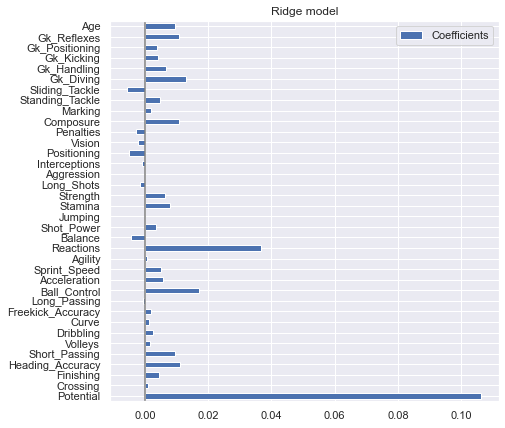

In [64]:
coefs = pd.DataFrame(
   lm.coef_,
   columns=['Coefficients'], index=X_train_val.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

Feature: 0, Score: 0.10778
Feature: 1, Score: 0.00128
Feature: 2, Score: 0.00489
Feature: 3, Score: 0.01100
Feature: 4, Score: 0.00897
Feature: 5, Score: 0.00150
Feature: 6, Score: 0.00253
Feature: 7, Score: 0.00126
Feature: 8, Score: 0.00203
Feature: 9, Score: -0.00010
Feature: 10, Score: 0.01638
Feature: 11, Score: 0.00507
Feature: 12, Score: 0.00522
Feature: 13, Score: 0.00062
Feature: 14, Score: 0.03644
Feature: 15, Score: -0.00433
Feature: 16, Score: 0.00351
Feature: 17, Score: -0.00002
Feature: 18, Score: 0.00831
Feature: 19, Score: 0.00617
Feature: 20, Score: -0.00194
Feature: 21, Score: -0.00031
Feature: 22, Score: -0.00076
Feature: 23, Score: -0.00517
Feature: 24, Score: -0.00227
Feature: 25, Score: -0.00287
Feature: 26, Score: 0.01035
Feature: 27, Score: 0.00194
Feature: 28, Score: 0.00443
Feature: 29, Score: -0.00547
Feature: 30, Score: 0.01219
Feature: 31, Score: 0.00678
Feature: 32, Score: 0.00412
Feature: 33, Score: 0.00320
Feature: 34, Score: 0.01104
Feature: 35, Score: 

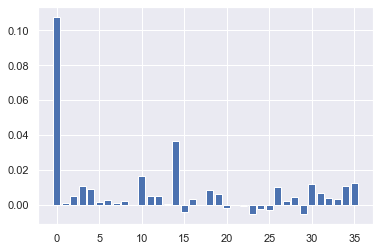

In [65]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# fit the model
lm.fit(X, y)
# get importance
importance = lm.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [66]:
final_df.to_csv('Machine_Learning_Output.csv')


In [67]:
import pickle

In [68]:
with open ('FIFA_PICKLE','wb') as f:
    pickle.dump(lm,f)

In [69]:
with open('FIFA_PICKLE','rb') as f:
    lm = pickle.load(f)